In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/facialemotion.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/Training/Sad/Sad-370.jpg  
  inflating: Training/Training/Sad/Sad-3700.jpg  
  inflating: Training/Training/Sad/Sad-3701.jpg  
  inflating: Training/Training/Sad/Sad-3702.jpg  
  inflating: Training/Training/Sad/Sad-3703.jpg  
  inflating: Training/Training/Sad/Sad-3704.jpg  
  inflating: Training/Training/Sad/Sad-3705.jpg  
  inflating: Training/Training/Sad/Sad-3706.jpg  
  inflating: Training/Training/Sad/Sad-3707.jpg  
  inflating: Training/Training/Sad/Sad-3708.jpg  
  inflating: Training/Training/Sad/Sad-3709.jpg  
  inflating: Training/Training/Sad/Sad-371.jpg  
  inflating: Training/Training/Sad/Sad-3710.jpg  
  inflating: Training/Training/Sad/Sad-3711.jpg  
  inflating: Training/Training/Sad/Sad-3712.jpg  
  inflating: Training/Training/Sad/Sad-3713.jpg  
  inflating: Training/Training/Sad/Sad-3714.jpg  
  inflating: Training/Training/Sad/Sad-3715.jpg  
  inflating: Training/Training/Sad/Sad-3716.jpg  
 

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

base_path = "/content/"

In [5]:
tot_train = 0
for expression in os.listdir(base_path+"Training/Training/"):
    print(str(len(os.listdir(base_path+"Training/Training/"+expression)))+" "+expression+" images")
    tot_train += len(os.listdir(base_path+"Training/Training/"+expression))
    pass

4097 Fear images
7215 Happy images
3995 Angry images
3171 Suprise images
4830 Sad images
4965 Neutral images


In [6]:
tot_train

28273

In [7]:
tot_test = 0
for expression in os.listdir(base_path+"Testing/Testing/"):
    print(str(len(os.listdir(base_path+"Testing/Testing/"+expression)))+" "+expression+" images")
    tot_test += len(os.listdir(base_path+"Testing/Testing/"+expression))
    pass

1024 Fear images
1774 Happy images
958 Angry images
831 Suprise images
1247 Sad images
1233 Neutral images


In [8]:
tot_test

7067

In [9]:
datasets = ['/content/Training/Training','/content/Testing/Testing']

output = []

class_names = ['Angry','Fear','Happy','Neutral','Sad','Suprise']

class_name_labels = {class_name:j for j,class_name in enumerate(class_names)}

nb_classes = len(class_names)

In [10]:
from tqdm import tqdm
import cv2

def load_dataset():
    
    for dataset in datasets:
        
        print("Loading {}".format(dataset))
        images,labels = [],[]
        
        for folder in os.listdir(dataset):
            label = class_name_labels[folder]
            for file in tqdm(os.listdir(os.path.join(dataset,folder))):
                
                img_path = os.path.join(os.path.join(dataset,folder),file)
                
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img,(48,48))
                
                images.append(img)
                labels.append(label)
                pass
            pass
            images_arr = np.array(images,dtype=np.float32)
            labels_arr = np.array(labels,dtype=np.float32)
        
        output.append((images_arr,labels_arr))
        pass
    
    return output
    pass

In [11]:
(train_images,train_labels),(test_images,test_labels) = load_dataset()

Loading /content/Training/Training


100%|██████████| 4965/4965 [00:00<00:00, 10969.45it/s]


Loading /content/Testing/Testing


100%|██████████| 1233/1233 [00:00<00:00, 10828.24it/s]


In [12]:
import pandas as pd

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

_, train_count = np.unique(train_labels,return_counts=True)
_, test_count = np.unique(test_labels,return_counts=True)

df = pd.DataFrame(data = (train_count,test_count))
df = df.T
df['Name'] = class_names
df = df.rename(columns={0: "Train", 1: "Test"})
df

,Train,Test,Name
0,3995,958,Angry
1,4097,1024,Fear
2,7215,1774,Happy
3,4965,1233,Neutral
4,4830,1247,Sad
5,3171,831,Suprise


<Figure size 432x288 with 0 Axes>

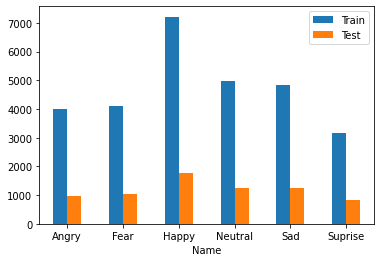

In [13]:
plt.figure()
df.set_index('Name').plot.bar(rot=0)

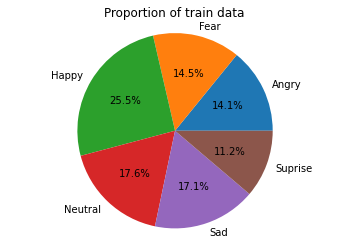

In [14]:
plt.pie(train_count,
       explode=(0,0,0,0,0,0),
       labels=class_names,
       autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of train data")
plt.show()


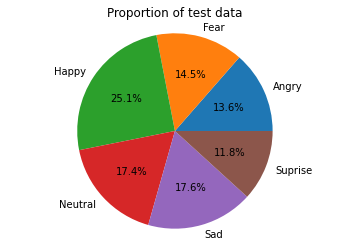

In [15]:
plt.pie(test_count,
       explode=(0,0,0,0,0,0),
       labels=class_names,
       autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Proportion of test data")
plt.show()

In [16]:
train_dir = '/content/Training/Training/'

In [17]:
IMG_SIZE= (48, 48)

In [18]:
def load_data(dir_path, IMG_SIZE):
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [19]:
X_train, y_train, train_labels = load_data(train_dir, IMG_SIZE)

100%|██████████| 6/6 [00:03<00:00,  1.77it/s]


28273 images loaded from /content/Training/Training/ directory.


In [20]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

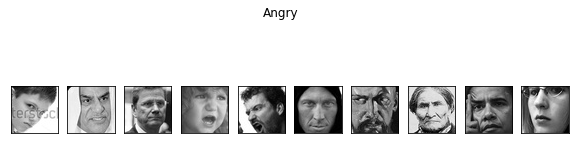

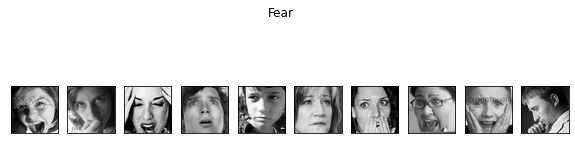

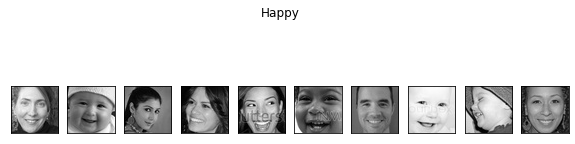

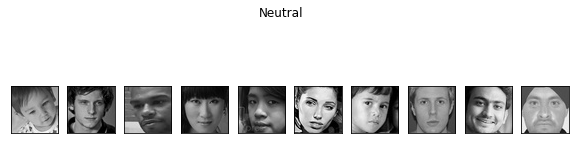

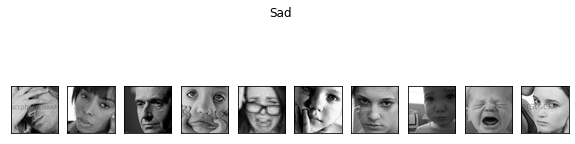

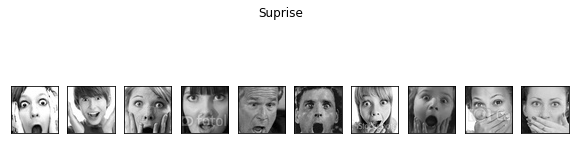

In [21]:
plot_samples(X_train, y_train, train_labels, 10)